In [1]:
##The purpose of this notebook is to generate the graphs of payoffs vs correlation for the uniform and normal case.

## Setting Parameters
mean = 5
support = 20
sigma = 3

In [2]:
## Imports
import pacal as pa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import measure
import matplotlib.colors as colors
from tqdm import tqdm_notebook as tqdm #Used to see how long it takes for loops to run
tqdm().pandas()
%matplotlib inline

Using compiled interpolation routine
Using compiled sparse grid routine


C:\Users\University Vivikth\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


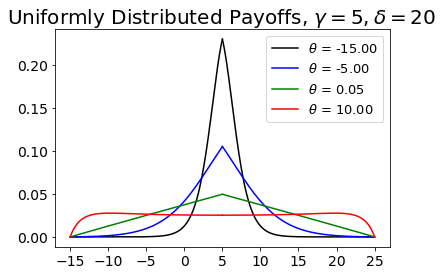

In [3]:
#Uniform Case

a = pa.UniformDistr(mean - support,  mean + support, sym = "X")
b = pa.UniformDistr(mean - support, mean + support, sym = "Y")
for theta, ls in [(-15, "black"), (-5, "blue"), (0.05, "green"), (10, "red")]:
    Copula = pa.FrankCopula(marginals = [a, b], theta = theta)
    M = pa.TwoVarsModel(Copula, 0.5 * (a + b))
    S = M.eval()
    S.plot(color = ls, label = '$ \\theta $ = %.2f'%theta )


#Plot Aesthetics
plt.title('Uniformly Distributed Payoffs, $\gamma = 5, \delta = 20$ ', fontsize= 20)
plt.legend(fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('BasicCorUniform.pgf')



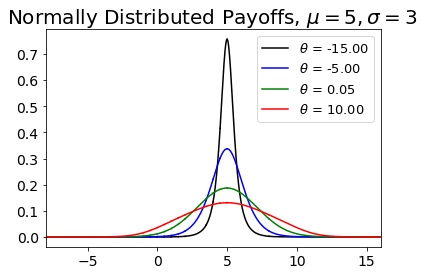

In [4]:
#Normal Case

#Initialising Normal Distributions
a_init = pa.NormalDistr(mean, sigma, sym = "X")
b_init = pa.NormalDistr(mean, sigma, sym = "Y")

#Truncating normal distributions to limit boundaries.
a_res = a_init | pa.Lt(max(10 * a_init.std(), 10))
a = a_res | pa.Gt(min(-10 * a_init.std(), -10))
b_res = b_init | pa.Lt(max(10 * b_init.std(), 10))
b = b_res | pa.Gt(min(-10 * b_init.std(), -10))

for theta, ls in tqdm([(-15, "black"), (-5, "blue"), (0.05, "green"), (10, "red")]):
    Copula = pa.FrankCopula(marginals = [a, b], theta = theta)
    M = pa.TwoVarsModel(Copula, 0.5 * (a + b))
    S = M.eval()
    S.plot(color = ls, label = '$ \\theta$ = %.2f'%theta )

#Plot Aesthetics
plt.title('Normally Distributed Payoffs, $\mu = 5, \sigma = 3$ ', fontsize= 20)
plt.legend(fontsize = 13)
plt.xlim(-8, 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('BasicCorNormal.pgf')
